<a href="https://colab.research.google.com/github/PriyankaManojaRout08/LETS_GROW_MORE_SEPTEMBER_2024/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME:-PRIYANKA MANOJA ROUT
DATA SCIENCE SEPTEMBER INTERNSHIP PROGRAM

INTERN AT LET'S GROW MORE

LEVEL-BEGINNER

TASK 2-STOCK MARKET PREDICTION AND STACKED LSTM

#IMPORTING LIBRARIES



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Importing Datasets

Here I have taken the dataset of Tesla Car Company

In [ ]:
import pandas as pd
df= pd.read_csv('/content/TESLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900,6,7,2010


In [ ]:
df.shape

(2416, 10)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2416.000000,2416.000000,2416.000000
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06,15.748344,6.645281,2014.776904
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06,8.757534,3.445464,2.787784
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,1.000000,1.000000,2010.000000
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06,8.000000,4.000000,2012.000000
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06,16.000000,7.000000,2015.000000
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06,23.000000,10.000000,2017.000000
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,31.000000,12.000000,2020.000000


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
 7   day        2416 non-null   int64  
 8   month      2416 non-null   int64  
 9   year       2416 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 188.9+ KB


# Line Plot

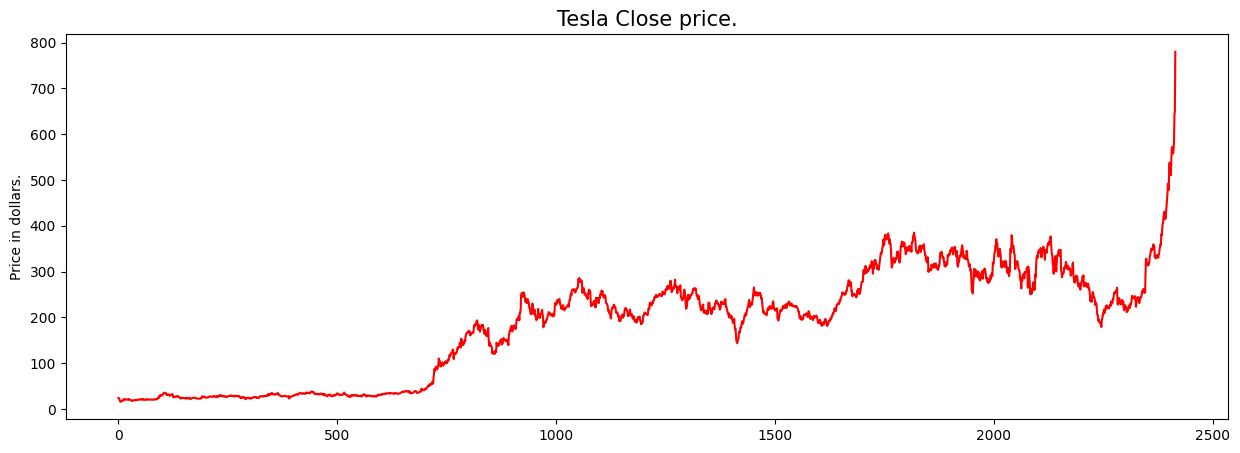

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'],color='red')
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900,6,7,2010


In [ ]:
df[df['Close'] == df['Adj Close']].shape

(2416, 10)

In [ ]:
df = df.drop(['Adj Close'], axis=1)

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
day       0
month     0
year      0
dtype: int64

# Dist Plot

<ipython-input-17-b8119f96509c>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-17-b8119f96509c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-17-b8119f96509c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the ne

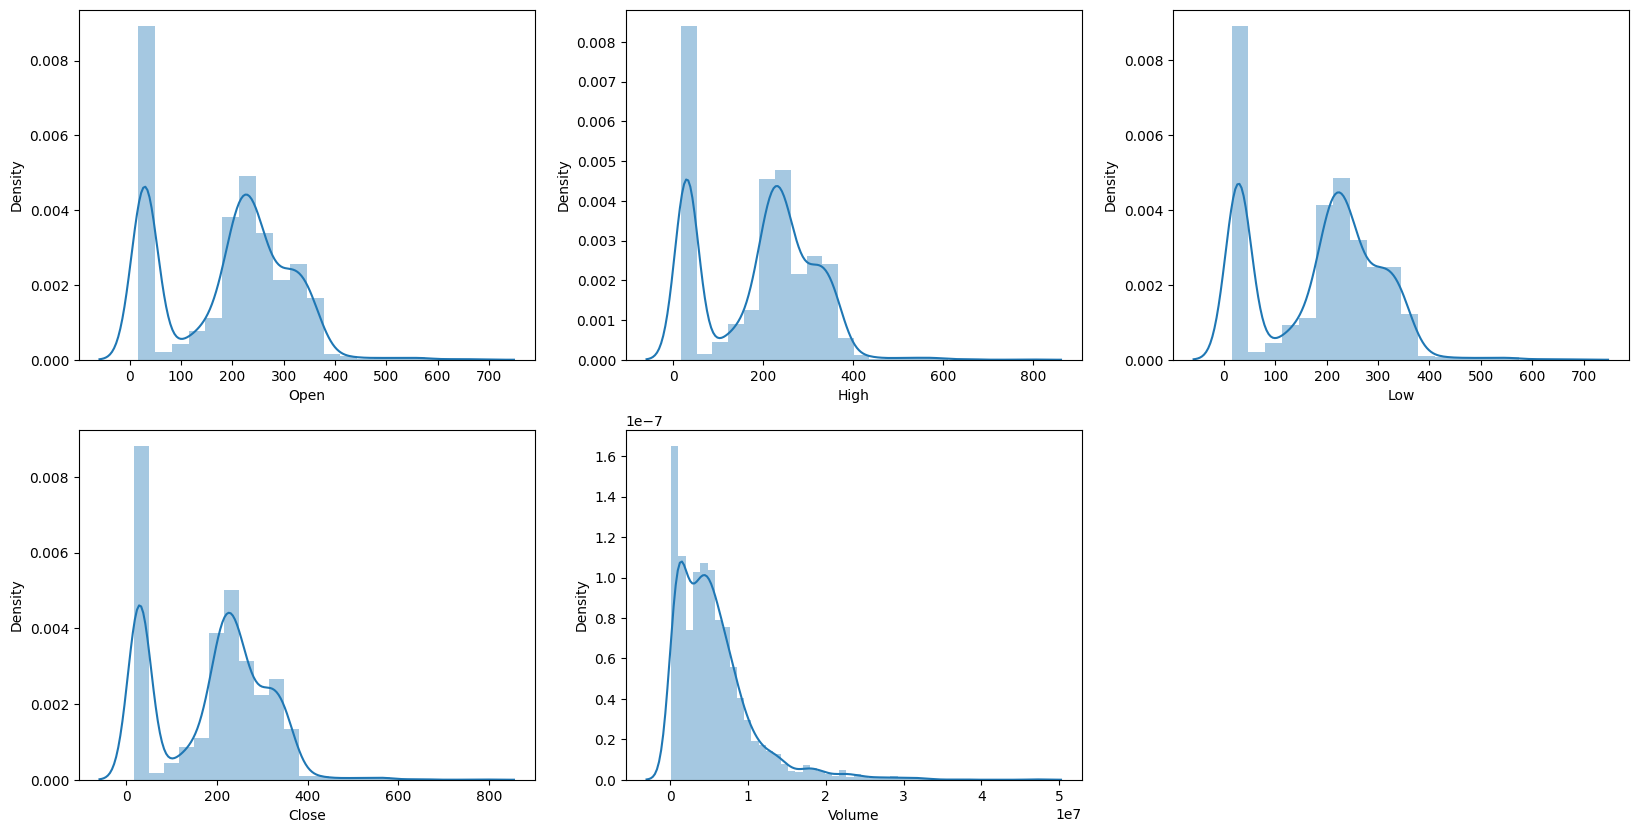

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

# Box Plot

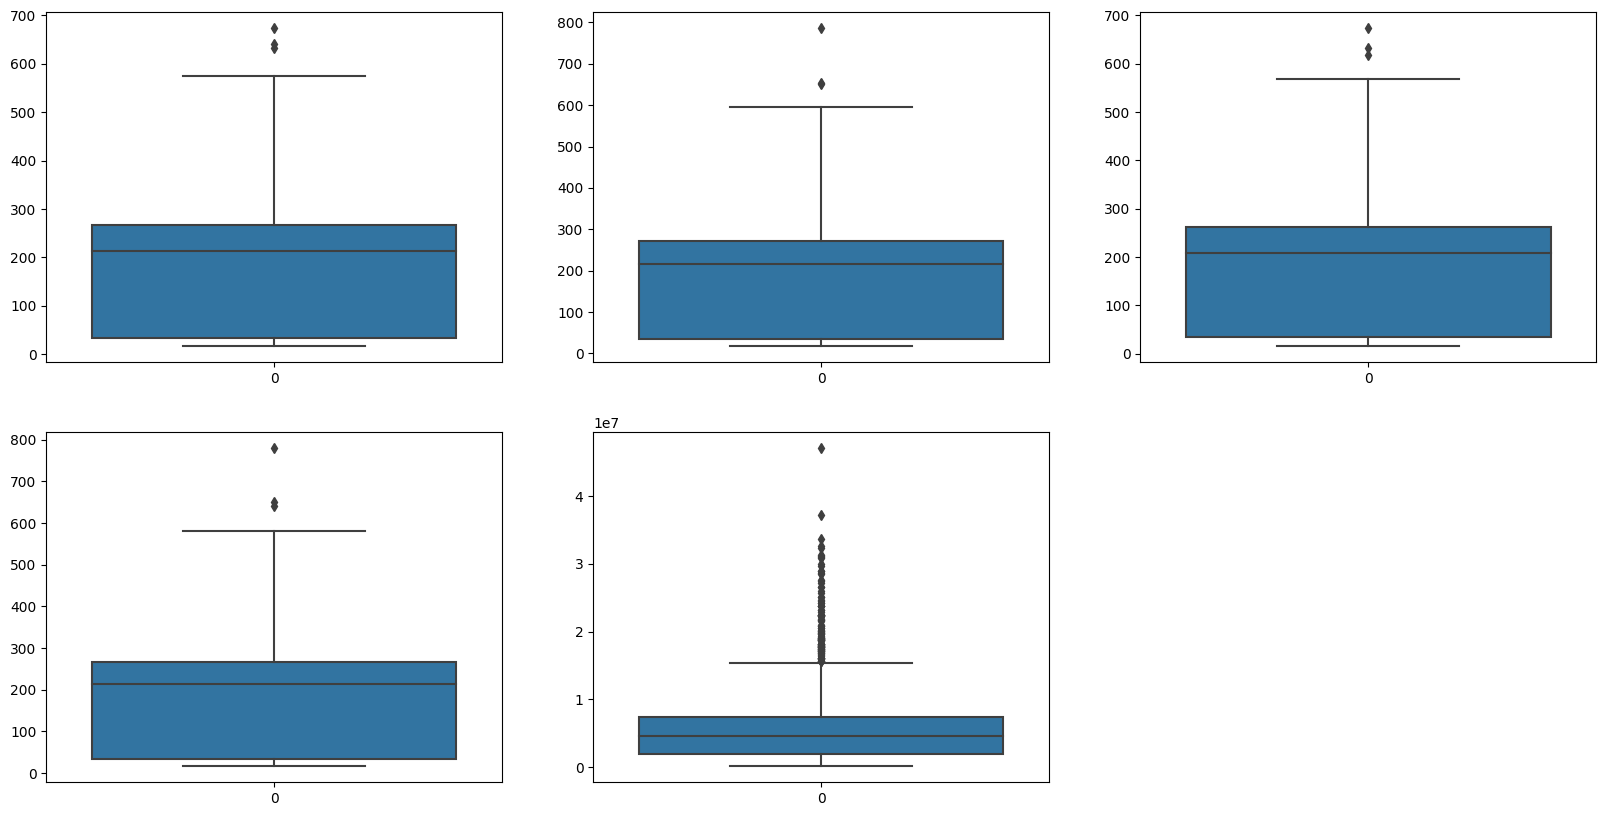

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

#Count Plot

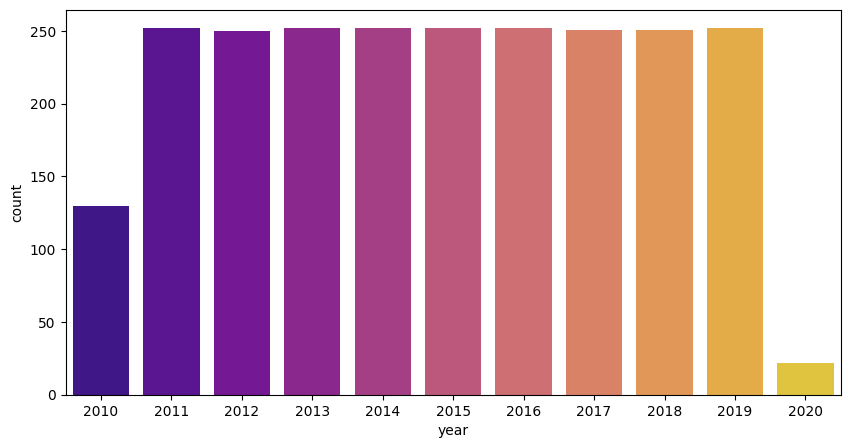

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(x ='year', data = df,palette='plasma')
plt.show()

Here we can see a boom in stocks from the year 2011 to somewhere around 2019.

#Bar Graph

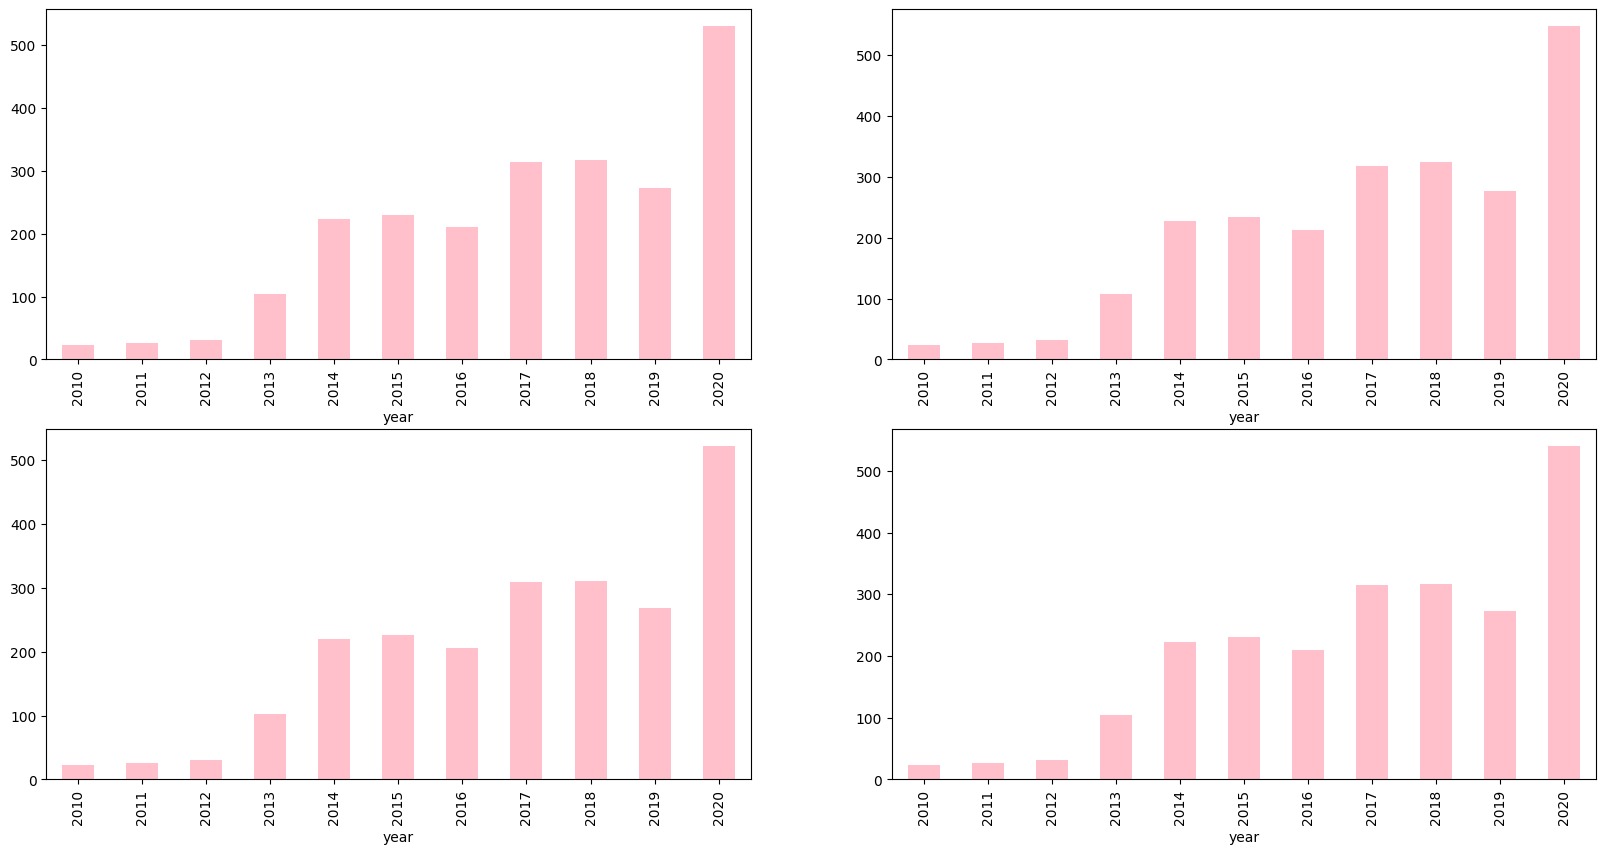

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar(color='pink')
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled from the year 2013 to that in 2014.

In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

#Pie Chart

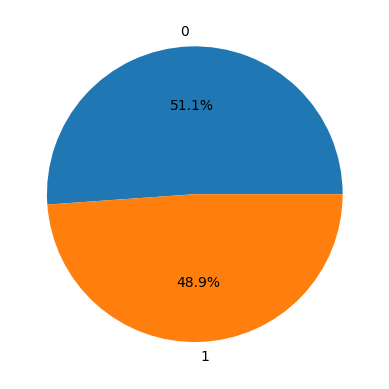

In [ ]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

#Heatmap

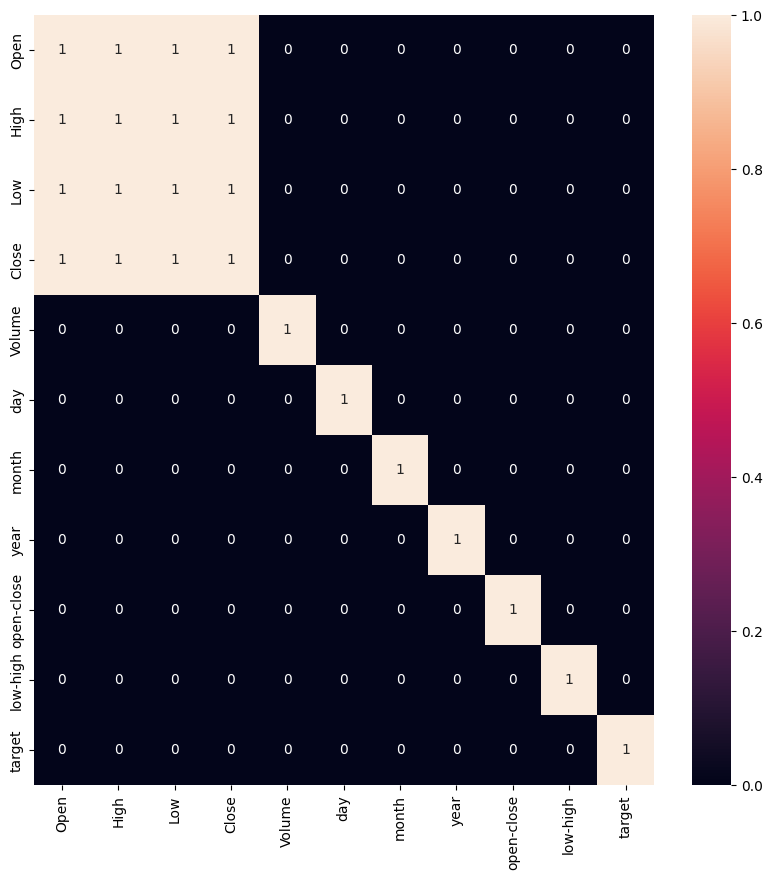

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.corr() > 0.9, annot=True, cbar=True)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

#Data Splitting and Normalization

In [ ]:
features = df[['open-close', 'low-high']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2174, 2) (242, 2)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

# Model Development and Evaluation

In [ ]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5056219493093215
Validation Accuracy :  0.4848795840175151

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5284090476129999
Validation Accuracy :  0.4610016420361248

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high.